In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
length = 10.220303457786414 * 4

def load_profess_den(den_file):
    with open(den_file, 'r') as f:
        temp = f.readline().split()
        dim_x = int(temp[1])
        dim_y = int(temp[3])
        dim_z = int(temp[5])
        den = np.array(temp[10:], dtype=np.float_).reshape((dim_z, dim_x, dim_y))
        return den

def load_abacus_den(den_file):
    den = np.loadtxt(den_file, skiprows=22).reshape(216,40,40)
    return den

In [3]:
files = ['./KS-BLPS/OUT.blpstest/SPIN1_CHG','./WT/cd100/Si.den','./HC_Al//cd100/Si.den','./1PROFESS_KERNEL//cd100/Si.den','./4PROFESS_KERNEL//cd100/Si.den','./7PROFESS_KERNEL//cd100/Si.den','./10PROFESS_KERNEL/cd100/Si.den']
labels = ['KS-BLPS', 'WT', 'HC', r'$\rm{TKK}^{\rm{m}}_{\rm{8}}$', r'$\rm{TKK}^{\rm{m}}_{\rm{12}}$', r'$\rm{TKK}^{\rm{m}}_{\rm{16}}$', r'$\rm{TKK}^{\rm{m}}_{\rm{20}}$']

ks = load_abacus_den(files[0])
wt = load_profess_den(files[1])
hc = load_profess_den(files[2])
tkk8 = load_profess_den(files[3])
tkk12 = load_profess_den(files[4])
tkk16 = load_profess_den(files[5])
tkk20 = load_profess_den(files[6])

data = [
    ks,
    wt,
    hc,
    tkk8,
    tkk12,
    tkk16,
    tkk20
]

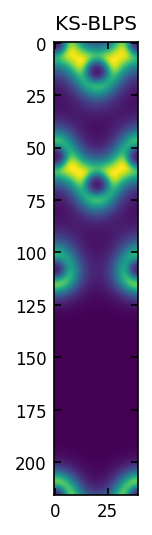

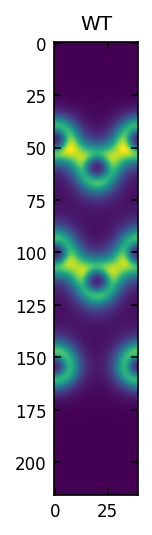

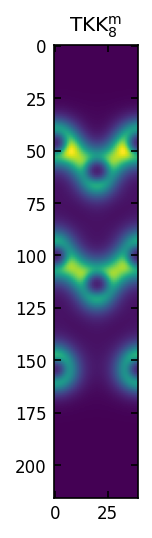

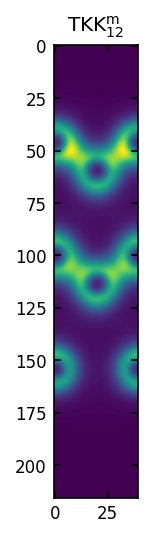

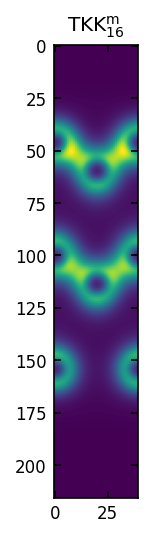

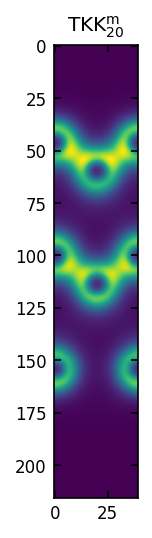

In [12]:
for i, each in enumerate(files):
    if 'KS' in each:
        den = load_abacus_den(each)
        plt.figure(dpi=150)
        plt.imshow(den[:,0,:])
        # plt.imshow(np.vstack((den[170:,0,:],den[:170,0,:])))
        plt.title(labels[i])
        plt.show()
    elif 'HC' in each:
        continue
    else:
        den = load_profess_den(each)
        plt.figure(dpi=150)
        plt.imshow(np.vstack((den[170:,0,:],den[:170,0,:])))
        plt.title(labels[i])
        plt.show()

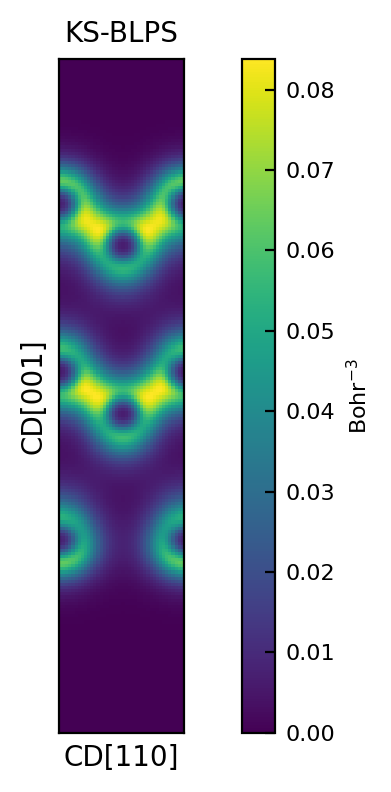

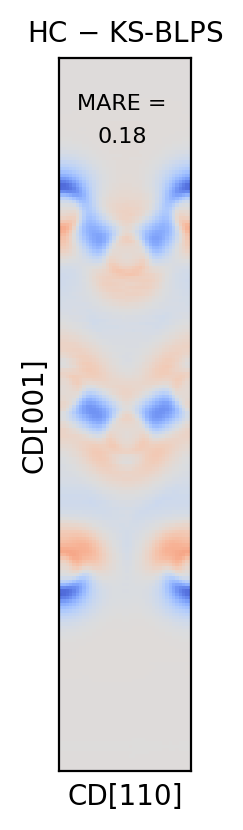

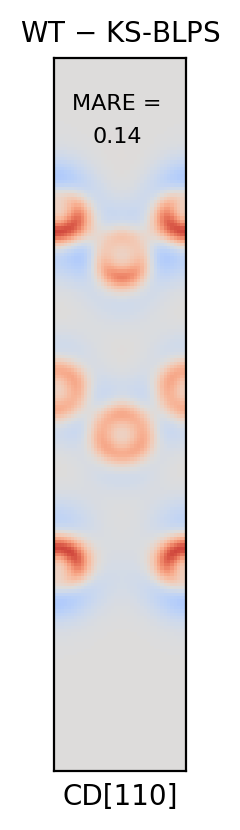

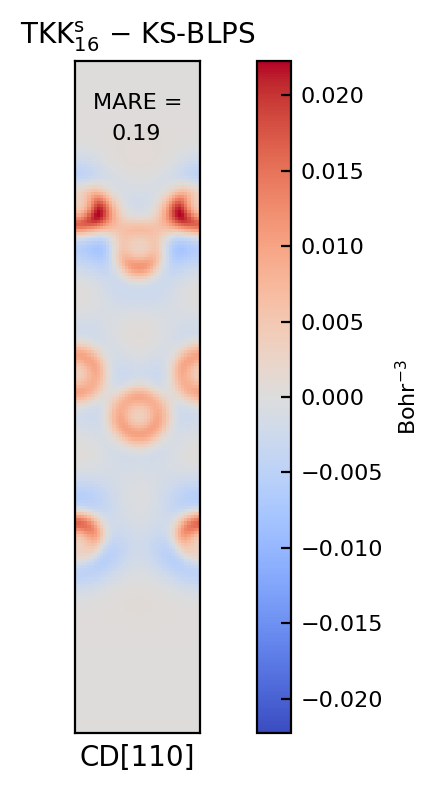

In [14]:
max1 = np.max(np.vstack([ks[:,0,:]]))
min1 = 0.
max2 = np.max(np.vstack([np.abs(ks[:,0,:] - wt[:,0,:]), np.abs(ks[:,0,:] - tkk16[:,0,:]), np.abs(ks[:,0,:] - hc[:,0,:])]))
min2 = -max2

# fig = plt.figure(figsize=(11.5/5*5,10.8), constrained_layout=True)
# fig = plt.figure(figsize=(11.5/5*5,10.8), constrained_layout=False)
# gs = plt.GridSpec(1,18,figure=fig)

plt.figure(dpi=200)
# plt.subplot(gs[0,0:5])
plt.imshow(np.vstack((ks[170:,0,:],ks[:170,0,:])))
plt.clim(min1, max1)
plt.yticks([])
plt.xticks([])
plt.ylabel('CD[001]', fontsize=10)
plt.xlabel('CD[110]', fontsize=10)
plt.title('KS-BLPS', fontsize=10)
plt.rcParams['font.size'] = 8
plt.colorbar(label=r'$\rm{Bohr}^{-3}$')
plt.tight_layout()

# plt.subplot(1,5,2)
# plt.imshow(np.vstack((wt[170:,0,:],wt[:170,0,:])))
# plt.clim(min1, max1)

# plt.subplot(1,5,3)
# plt.imshow(np.vstack((tkk16[170:,0,:],tkk16[:170,0,:])))
# plt.clim(min1, max1)
# plt.subplot(gs[2])

# plt.subplot(gs[0,5:9])
plt.figure(dpi=200)
plt.imshow(np.vstack((hc[170:,0,:] - ks[170:,0,:],hc[:170,0,:] - ks[:170,0,:])), cmap=cm.coolwarm)
# plt.text(7, 15, "MAE = %.1e" % np.mean(np.abs(tkk16-ks)), fontsize=8)
plt.text(5, 15, "MARE =", fontsize=8)
# plt.text(8, 25, "%.2f" % np.mean(np.abs(hc-ks)/ks), fontsize=8)
plt.text(11, 25, "%.2f" % np.mean(np.abs(np.vstack([hc[190:,0,:] - ks[190:,0,:],hc[:130,0,:] - ks[:130,0,:]]))/np.vstack([ks[190:,0,:], ks[:130,0,:]])), fontsize=8)
# plt.text(10, 15, "MARE = %.2f" % np.mean(np.abs(tkk16-ks)/ks), fontsize=8)
plt.yticks([])
plt.xticks([])
plt.ylabel('CD[001]', fontsize=10)
plt.xlabel('CD[110]', fontsize=10)
plt.clim(min2, max2)
plt.tight_layout()
plt.title('HC $-$ KS-BLPS', fontsize=10)
# plt.show()

plt.figure(dpi=200)
# plt.subplot(gs[0,9:13])
plt.imshow(np.vstack((wt[170:,0,:] - ks[170:,0,:],wt[:170,0,:] - ks[:170,0,:])), cmap=cm.coolwarm)
# plt.text(7, 15, "MAE = %.1e" % np.mean(np.abs(tkk16-ks)), fontsize=8)
plt.text(5, 15, "MARE =", fontsize=8)
plt.text(11, 25, "%.2f" % np.mean(np.abs(np.vstack([wt[190:,0,:] - ks[190:,0,:],wt[:130,0,:] - ks[:130,0,:]]))/np.vstack([ks[190:,0,:], ks[:130,0,:]])), fontsize=8)
# plt.text(11, 25, "%.2f" % np.mean(np.abs(wt-ks)/ks), fontsize=8)
# plt.text(10, 15, "MARE = %.2f" % np.mean(np.abs(tkk16-ks)/ks), fontsize=8)
plt.yticks([])
plt.xticks([])
plt.xlabel('CD[110]', fontsize=10)
plt.clim(min2, max2)
plt.tight_layout()
plt.title('WT $-$ KS-BLPS', fontsize=10)

plt.figure(dpi=200)
# plt.subplot(gs[0,13:18])
plt.imshow(np.vstack((tkk16[170:,0,:] - ks[170:,0,:],tkk16[:170,0,:] - ks[:170,0,:])), cmap=cm.coolwarm)
# plt.text(7, 15, "MAE = %.1e" % np.mean(np.abs(tkk16-ks)), fontsize=8)
plt.text(5, 15, "MARE =", fontsize=8)
plt.text(11, 25, "%.2f" % np.mean(np.abs(np.vstack([tkk16[190:,0,:] - ks[190:,0,:],tkk16[:130,0,:] - ks[:130,0,:]]))/np.vstack([ks[190:,0,:], ks[:130,0,:]])), fontsize=8)
# plt.text(10, 25, "%.2f" % np.mean(np.abs(tkk16-ks)/ks), fontsize=8)
# plt.text(10, 15, "MARE = %.2f" % np.mean(np.abs(tkk16-ks)/ks), fontsize=8)
plt.yticks([])
plt.xticks([])
plt.xlabel('CD[110]', fontsize=10)
plt.clim(min2, max2)
plt.title(r'$\rm{TKK}^{\rm{s}}_{\rm{16}}$ $-$ KS-BLPS', fontsize=10)
plt.tight_layout()
plt.rcParams['font.size'] = 8
plt.colorbar(label=r'$\rm{Bohr}^{-3}$')

# plt.subplot(gs[7])

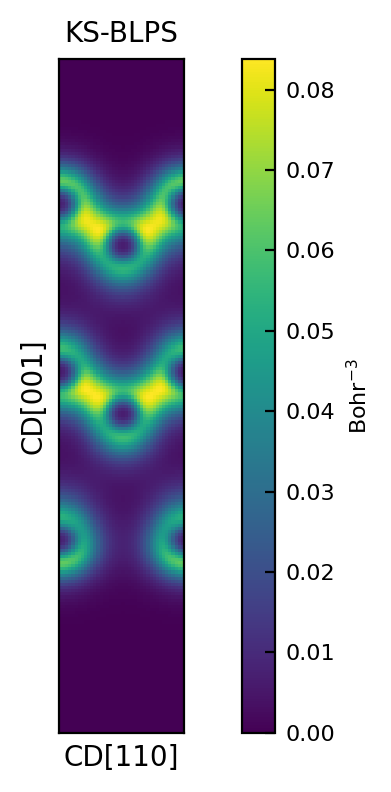

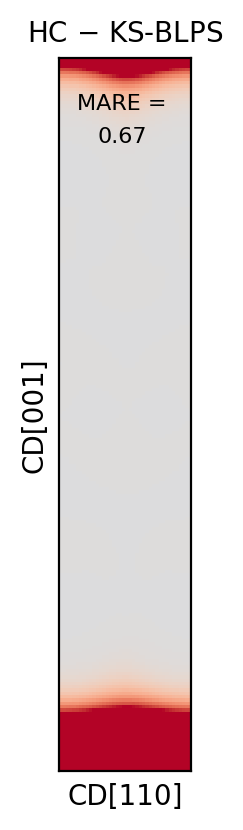

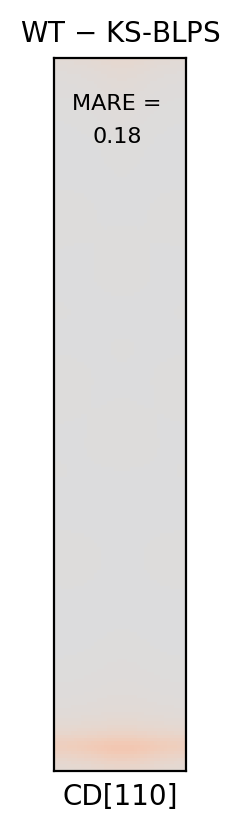

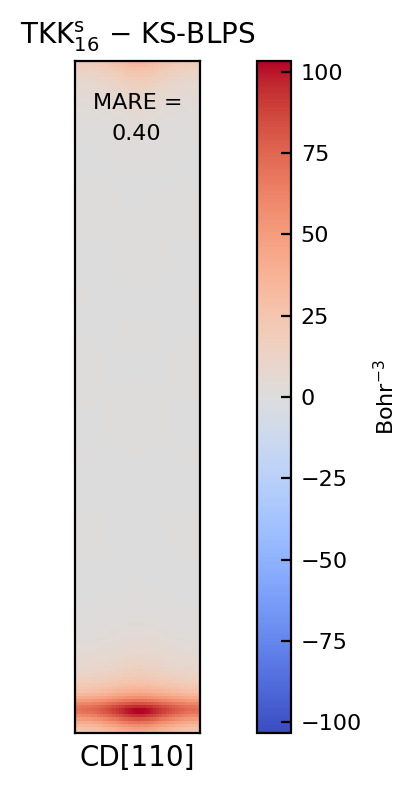

In [11]:
max1 = np.max(np.vstack([ks[:,0,:]]))
min1 = 0.
# max2 = np.max(np.vstack([np.abs(ks[:,0,:] - wt[:,0,:]), np.abs(ks[:,0,:] - tkk16[:,0,:]), np.abs(ks[:,0,:] - hc[:,0,:])]))
max2 = np.max(np.vstack([np.abs(ks[:,0,:] - wt[:,0,:])/ks[:,0,:], np.abs(ks[:,0,:] - tkk16[:,0,:])/ks[:,0,:], np.abs(ks[:,0,:] - hc[:,0,:])]))
min2 = -max2

# fig = plt.figure(figsize=(11.5/5*5,10.8), constrained_layout=True)
# fig = plt.figure(figsize=(11.5/5*5,10.8), constrained_layout=False)
# gs = plt.GridSpec(1,18,figure=fig)

plt.figure(dpi=200)
# plt.subplot(gs[0,0:5])
plt.imshow(np.vstack((ks[170:,0,:],ks[:170,0,:])))
plt.clim(min1, max1)
plt.yticks([])
plt.xticks([])
plt.ylabel('CD[001]', fontsize=10)
plt.xlabel('CD[110]', fontsize=10)
plt.title('KS-BLPS', fontsize=10)
plt.rcParams['font.size'] = 8
plt.colorbar(label=r'$\rm{Bohr}^{-3}$')
plt.tight_layout()

# plt.subplot(1,5,2)
# plt.imshow(np.vstack((wt[170:,0,:],wt[:170,0,:])))
# plt.clim(min1, max1)

# plt.subplot(1,5,3)
# plt.imshow(np.vstack((tkk16[170:,0,:],tkk16[:170,0,:])))
# plt.clim(min1, max1)
# plt.subplot(gs[2])

# plt.subplot(gs[0,5:9])
plt.figure(dpi=200)
plt.imshow(np.vstack(((hc[170:,0,:] - ks[170:,0,:])/ks[170:,0,:],(hc[:170,0,:] - ks[:170,0,:])/ks[:170,0,:])), cmap=cm.coolwarm)
# plt.text(7, 15, "MAE = %.1e" % np.mean(np.abs(tkk16-ks)), fontsize=8)
plt.text(5, 15, "MARE =", fontsize=8)
# plt.text(8, 25, "%.2f" % np.mean(np.abs(hc-ks)/ks), fontsize=8)
plt.text(11, 25, "%.2f" % np.mean(np.abs(np.vstack([hc[195:,0,:] - ks[195:,0,:],hc[:145,0,:] - ks[:145,0,:]]))/np.vstack([ks[195:,0,:], ks[:145,0,:]])), fontsize=8)
# plt.text(10, 15, "MARE = %.2f" % np.mean(np.abs(tkk16-ks)/ks), fontsize=8)
plt.yticks([])
plt.xticks([])
plt.ylabel('CD[001]', fontsize=10)
plt.xlabel('CD[110]', fontsize=10)
plt.clim(min2, max2)
plt.tight_layout()
plt.title('HC $-$ KS-BLPS', fontsize=10)
# plt.show()

plt.figure(dpi=200)
# plt.subplot(gs[0,9:13])
plt.imshow(np.vstack(((wt[170:,0,:] - ks[170:,0,:])/ks[170:,0,:],(wt[:170,0,:] - ks[:170,0,:])/ks[:170,0,:])), cmap=cm.coolwarm)
# plt.text(7, 15, "MAE = %.1e" % np.mean(np.abs(tkk16-ks)), fontsize=8)
plt.text(5, 15, "MARE =", fontsize=8)
plt.text(11, 25, "%.2f" % np.mean(np.abs(np.vstack([wt[195:,0,:] - ks[195:,0,:],wt[:145,0,:] - ks[:145,0,:]]))/np.vstack([ks[195:,0,:], ks[:145,0,:]])), fontsize=8)
# plt.text(11, 25, "%.2f" % np.mean(np.abs(wt-ks)/ks), fontsize=8)
# plt.text(10, 15, "MARE = %.2f" % np.mean(np.abs(tkk16-ks)/ks), fontsize=8)
plt.yticks([])
plt.xticks([])
plt.xlabel('CD[110]', fontsize=10)
plt.clim(min2, max2)
plt.tight_layout()
plt.title('WT $-$ KS-BLPS', fontsize=10)

plt.figure(dpi=200)
# plt.subplot(gs[0,13:18])
plt.imshow(np.vstack(((tkk16[170:,0,:] - ks[170:,0,:])/ks[170:,0,:],(tkk16[:170,0,:] - ks[:170,0,:])/ks[:170,0,:])), cmap=cm.coolwarm)
# plt.text(7, 15, "MAE = %.1e" % np.mean(np.abs(tkk16-ks)), fontsize=8)
plt.text(5, 15, "MARE =", fontsize=8)
plt.text(11, 25, "%.2f" % np.mean(np.abs(np.vstack([tkk16[195:,0,:] - ks[195:,0,:],tkk16[:145,0,:] - ks[:145,0,:]]))/np.vstack([ks[195:,0,:], ks[:145,0,:]])), fontsize=8)
# plt.text(10, 25, "%.2f" % np.mean(np.abs(tkk16-ks)/ks), fontsize=8)
# plt.text(10, 15, "MARE = %.2f" % np.mean(np.abs(tkk16-ks)/ks), fontsize=8)
plt.yticks([])
plt.xticks([])
plt.xlabel('CD[110]', fontsize=10)
plt.clim(min2, max2)
plt.title(r'$\rm{TKK}^{\rm{s}}_{\rm{16}}$ $-$ KS-BLPS', fontsize=10)
plt.tight_layout()
plt.rcParams['font.size'] = 8
plt.colorbar(label=r'$\rm{Bohr}^{-3}$')

# plt.subplot(gs[7])

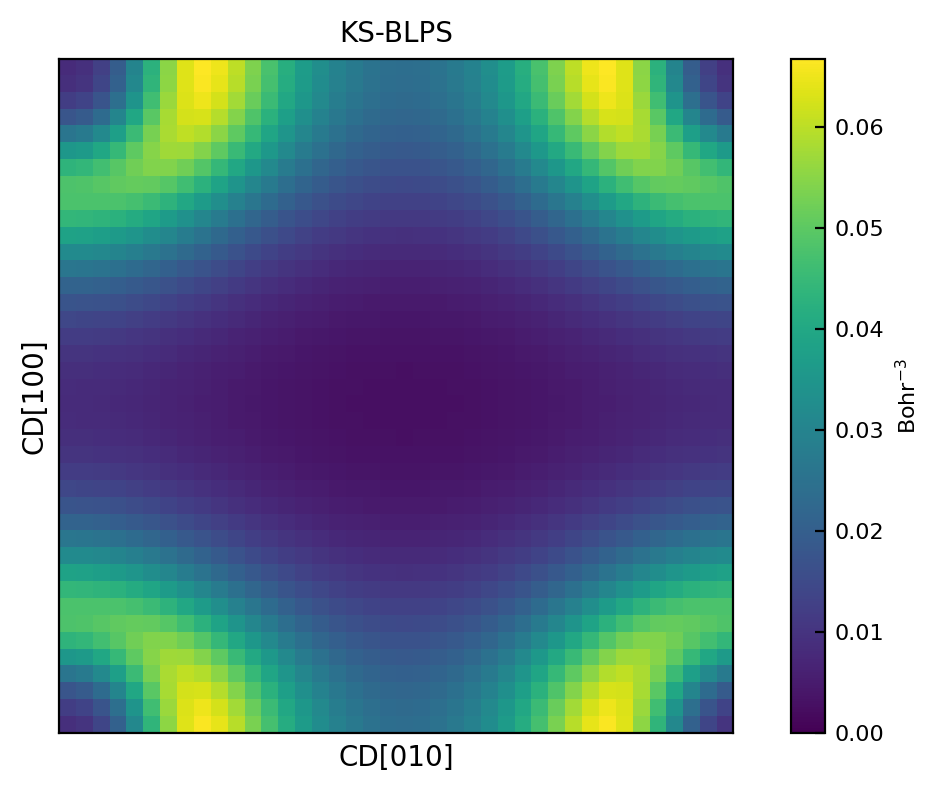

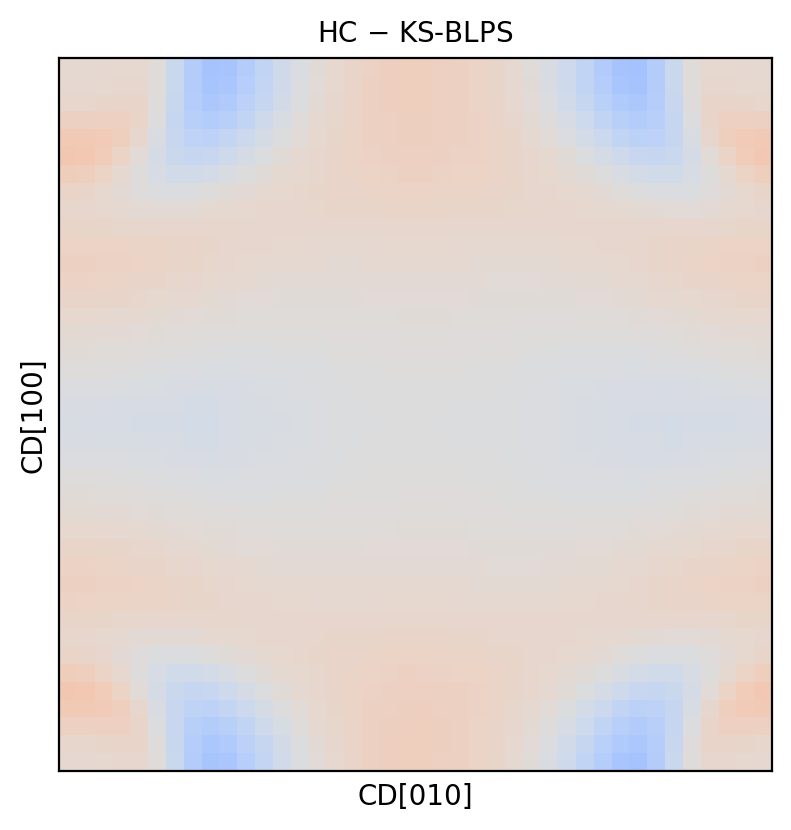

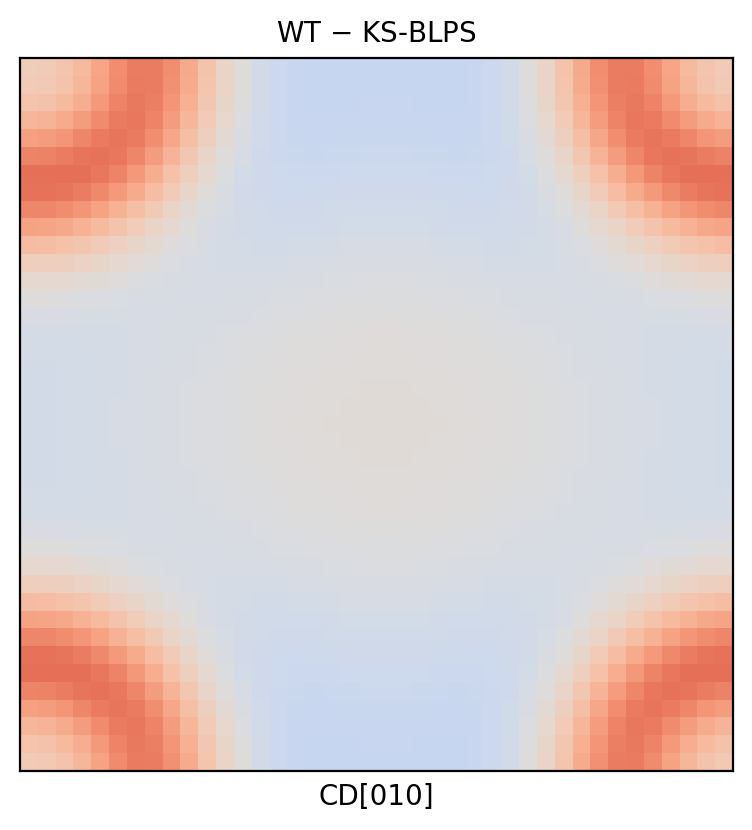

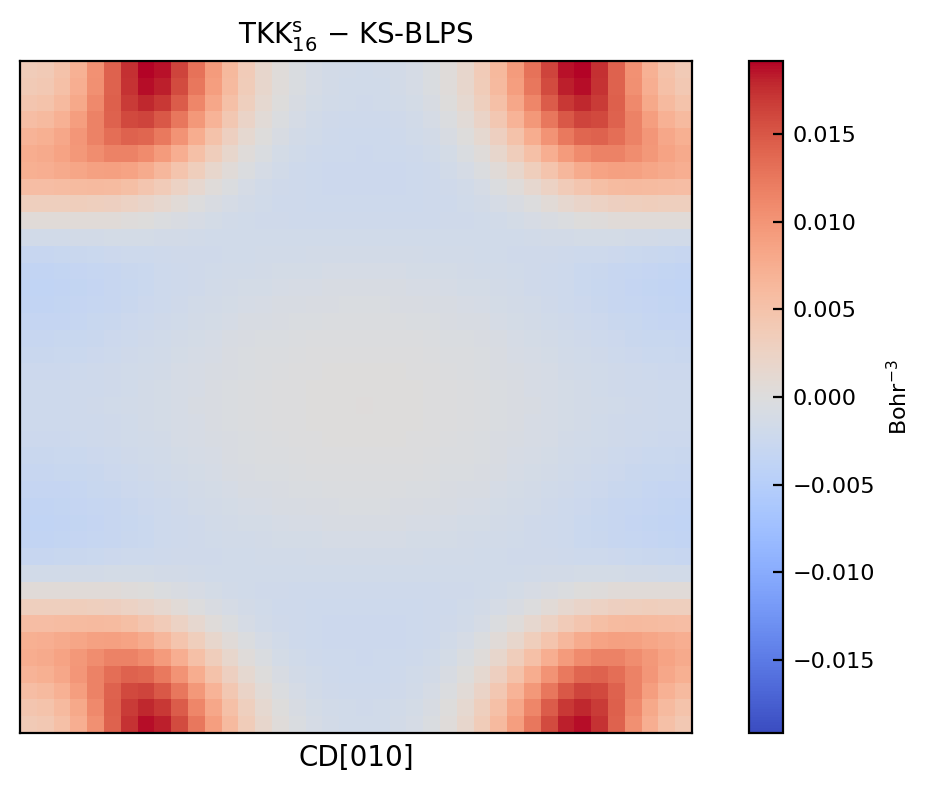

In [8]:
max1 = np.max(np.vstack([ks[0,:,:]]))
min1 = 0.
max2 = np.max(np.vstack([np.abs(ks[0,:,:] - wt[0,:,:]), np.abs(ks[0,:,:] - tkk16[0,:,:]), np.abs(ks[0,:,:] - hc[0,:,:])]))
min2 = -max2

# fig = plt.figure(figsize=(11.5/5*5,10.8), constrained_layout=True)
# fig = plt.figure(figsize=(11.5/5*5,10.8), constrained_layout=False)
# gs = plt.GridSpec(1,18,figure=fig)

plt.figure(dpi=200)
# plt.subplot(gs[0,0:5])
plt.imshow(ks[0,:,:])
plt.clim(min1, max1)
plt.yticks([])
plt.xticks([])
plt.ylabel('CD[100]', fontsize=10)
plt.xlabel('CD[010]', fontsize=10)
plt.title('KS-BLPS', fontsize=10)
plt.rcParams['font.size'] = 8
plt.colorbar(label=r'$\rm{Bohr}^{-3}$')
plt.tight_layout()

# plt.subplot(1,5,2)
# plt.imshow(np.vstack((wt[170:,0,:],wt[:170,0,:])))
# plt.clim(min1, max1)

# plt.subplot(1,5,3)
# plt.imshow(np.vstack((tkk16[170:,0,:],tkk16[:170,0,:])))
# plt.clim(min1, max1)
# plt.subplot(gs[2])

# plt.subplot(gs[0,5:9])
plt.figure(dpi=200)
plt.imshow(hc[0,:,:] - ks[0,:,:], cmap=cm.coolwarm)
# plt.text(7, 15, "MAE = %.1e" % np.mean(np.abs(tkk16-ks)), fontsize=8)
# plt.text(5, 15, "MARE =", fontsize=8)
# plt.text(8, 25, "%.2f" % np.mean(np.abs(hc-ks)/ks), fontsize=8)
# plt.text(11, 25, "%.2f" % np.mean(np.abs(np.vstack([hc[195:,0,:] - ks[195:,0,:],hc[:145,0,:] - ks[:145,0,:]]))/np.vstack([ks[195:,0,:], ks[:145,0,:]])), fontsize=8)
# plt.text(10, 15, "MARE = %.2f" % np.mean(np.abs(tkk16-ks)/ks), fontsize=8)
plt.yticks([])
plt.xticks([])
plt.ylabel('CD[100]', fontsize=10)
plt.xlabel('CD[010]', fontsize=10)
plt.clim(min2, max2)
plt.tight_layout()
plt.title('HC $-$ KS-BLPS', fontsize=10)
# plt.show()

plt.figure(dpi=200)
# plt.subplot(gs[0,9:13])
plt.imshow(wt[0,:,:] - ks[0,:,:], cmap=cm.coolwarm)
# plt.text(7, 15, "MAE = %.1e" % np.mean(np.abs(tkk16-ks)), fontsize=8)
# plt.text(5, 15, "MARE =", fontsize=8)
# plt.text(11, 25, "%.2f" % np.mean(np.abs(np.vstack([wt[195:,0,:] - ks[195:,0,:],wt[:145,0,:] - ks[:145,0,:]]))/np.vstack([ks[195:,0,:], ks[:145,0,:]])), fontsize=8)
# plt.text(11, 25, "%.2f" % np.mean(np.abs(wt-ks)/ks), fontsize=8)
# plt.text(10, 15, "MARE = %.2f" % np.mean(np.abs(tkk16-ks)/ks), fontsize=8)
plt.yticks([])
plt.xticks([])
plt.xlabel('CD[010]', fontsize=10)
plt.clim(min2, max2)
plt.tight_layout()
plt.title('WT $-$ KS-BLPS', fontsize=10)

plt.figure(dpi=200)
# plt.subplot(gs[0,13:18])
plt.imshow(tkk16[0,:,:] - ks[0,:,:], cmap=cm.coolwarm)
# plt.text(7, 15, "MAE = %.1e" % np.mean(np.abs(tkk16-ks)), fontsize=8)
# plt.text(5, 15, "MARE =", fontsize=8)
# plt.text(11, 25, "%.2f" % np.mean(np.abs(np.vstack([tkk16[195:,0,:] - ks[195:,0,:],tkk16[:145,0,:] - ks[:145,0,:]]))/np.vstack([ks[195:,0,:], ks[:145,0,:]])), fontsize=8)
# plt.text(10, 25, "%.2f" % np.mean(np.abs(tkk16-ks)/ks), fontsize=8)
# plt.text(10, 15, "MARE = %.2f" % np.mean(np.abs(tkk16-ks)/ks), fontsize=8)
plt.yticks([])
plt.xticks([])
plt.xlabel('CD[010]', fontsize=10)
plt.clim(min2, max2)
plt.title(r'$\rm{TKK}^{\rm{s}}_{\rm{16}}$ $-$ KS-BLPS', fontsize=10)
plt.tight_layout()
plt.rcParams['font.size'] = 8
plt.colorbar(label=r'$\rm{Bohr}^{-3}$')

# plt.subplot(gs[7])

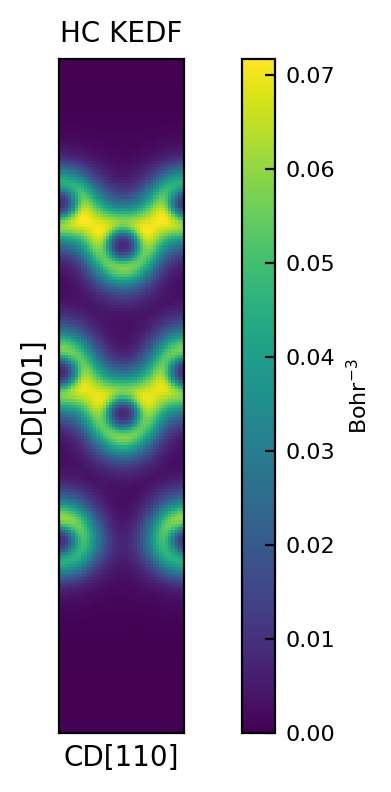

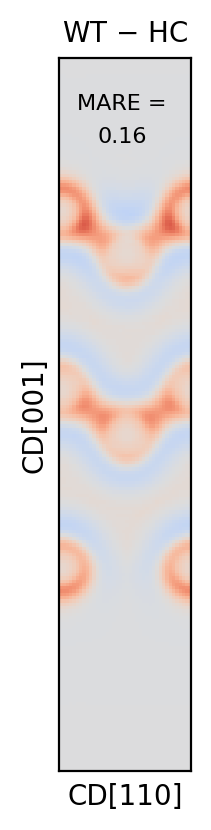

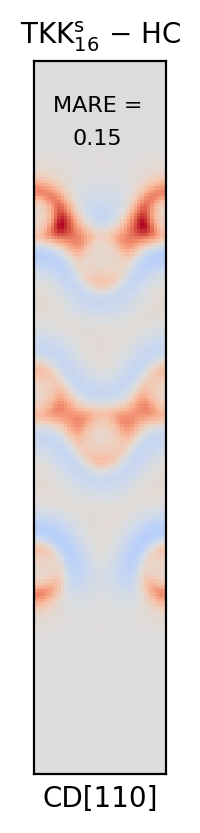

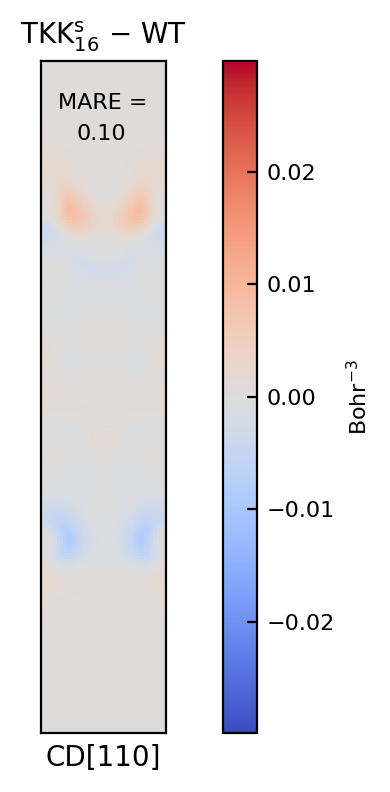

In [5]:
max1 = np.max(np.vstack([hc[:,0,:]]))
min1 = 0.
max2 = np.max(np.vstack([np.abs(hc[:,0,:] - wt[:,0,:]), np.abs(hc[:,0,:] - tkk16[:,0,:])]))
min2 = -max2

# fig = plt.figure(figsize=(11.5/5*5,10.8), constrained_layout=True)
# fig = plt.figure(figsize=(11.5/5*5,10.8), constrained_layout=False)
# gs = plt.GridSpec(1,18,figure=fig)

plt.figure(dpi=200)
# plt.subplot(gs[0,0:5])
plt.imshow(np.vstack((hc[170:,0,:],hc[:170,0,:])))
plt.clim(min1, max1)
plt.yticks([])
plt.xticks([])
plt.ylabel('CD[001]', fontsize=10)
plt.xlabel('CD[110]', fontsize=10)
plt.title('HC KEDF', fontsize=10)
plt.rcParams['font.size'] = 8
plt.colorbar(label=r'$\rm{Bohr}^{-3}$')
plt.tight_layout()

# plt.subplot(1,5,2)
# plt.imshow(np.vstack((wt[170:,0,:],wt[:170,0,:])))
# plt.clim(min1, max1)

# plt.subplot(1,5,3)
# plt.imshow(np.vstack((tkk16[170:,0,:],tkk16[:170,0,:])))
# plt.clim(min1, max1)
# plt.subplot(gs[2])

# plt.subplot(gs[0,5:9])
plt.figure(dpi=200)
plt.imshow(np.vstack((wt[170:,0,:] - hc[170:,0,:],wt[:170,0,:] - hc[:170,0,:])), cmap=cm.coolwarm)
# plt.text(7, 15, "MAE = %.1e" % np.mean(np.abs(tkk16-ks)), fontsize=8)
plt.text(5, 15, "MARE =", fontsize=8)
# plt.text(8, 25, "%.2f" % np.mean(np.abs(hc-ks)/ks), fontsize=8)
plt.text(11, 25, "%.2f" % np.mean(np.abs(np.vstack([hc[190:,0,:] - wt[190:,0,:],hc[:130,0,:] - wt[:130,0,:]]))/np.vstack([hc[190:,0,:], hc[:130,0,:]])), fontsize=8)
# plt.text(10, 15, "MARE = %.2f" % np.mean(np.abs(tkk16-ks)/ks), fontsize=8)
plt.yticks([])
plt.xticks([])
plt.ylabel('CD[001]', fontsize=10)
plt.xlabel('CD[110]', fontsize=10)
plt.clim(min2, max2)
plt.tight_layout()
plt.title('WT $-$ HC', fontsize=10)
# plt.show()

plt.figure(dpi=200)
# plt.subplot(gs[0,9:13])
plt.imshow(np.vstack((tkk16[170:,0,:] - hc[170:,0,:],tkk16[:170,0,:] - hc[:170,0,:])), cmap=cm.coolwarm)
# plt.text(7, 15, "MAE = %.1e" % np.mean(np.abs(tkk16-ks)), fontsize=8)
plt.text(5, 15, "MARE =", fontsize=8)
plt.text(11, 25, "%.2f" % np.mean(np.abs(np.vstack([tkk16[190:,0,:] - hc[190:,0,:],tkk16[:130,0,:] - hc[:130,0,:]]))/np.vstack([hc[190:,0,:], hc[:130,0,:]])), fontsize=8)
# plt.text(11, 25, "%.2f" % np.mean(np.abs(wt-ks)/ks), fontsize=8)
# plt.text(10, 15, "MARE = %.2f" % np.mean(np.abs(tkk16-ks)/ks), fontsize=8)
plt.yticks([])
plt.xticks([])
plt.xlabel('CD[110]', fontsize=10)
plt.clim(min2, max2)
plt.tight_layout()
plt.title(r'$\rm{TKK}^{\rm{s}}_{\rm{16}}$ $-$ HC', fontsize=10)

plt.figure(dpi=200)
# plt.subplot(gs[0,13:18])
plt.imshow(np.vstack((tkk16[170:,0,:] - wt[170:,0,:],tkk16[:170,0,:] - wt[:170,0,:])), cmap=cm.coolwarm)
# plt.text(7, 15, "MAE = %.1e" % np.mean(np.abs(tkk16-ks)), fontsize=8)
plt.text(5, 15, "MARE =", fontsize=8)
plt.text(11, 25, "%.2f" % np.mean(np.abs(np.vstack([tkk16[190:,0,:] - wt[190:,0,:],tkk16[:130,0,:] - wt[:130,0,:]]))/np.vstack([wt[190:,0,:], wt[:130,0,:]])), fontsize=8)
# plt.text(10, 25, "%.2f" % np.mean(np.abs(tkk16-ks)/ks), fontsize=8)
# plt.text(10, 15, "MARE = %.2f" % np.mean(np.abs(tkk16-ks)/ks), fontsize=8)
plt.yticks([])
plt.xticks([])
plt.xlabel('CD[110]', fontsize=10)
plt.clim(min2, max2)
plt.title(r'$\rm{TKK}^{\rm{s}}_{\rm{16}}$ $-$ WT', fontsize=10)
plt.tight_layout()
plt.rcParams['font.size'] = 8
plt.colorbar(label=r'$\rm{Bohr}^{-3}$')

# plt.subplot(gs[7])

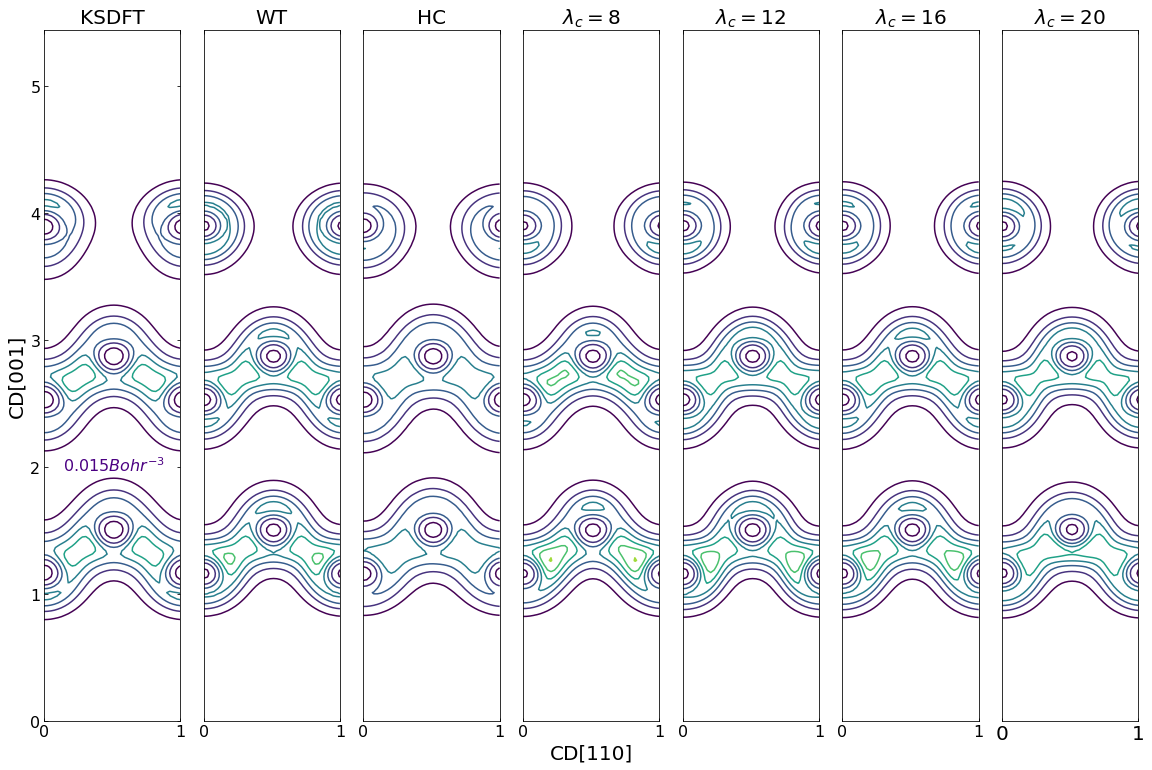

In [46]:
# from matplotlib import gridspec
# x = np.linspace(0,39/40,40)*3.8244175470559023/0.529177249
# y = np.linspace(0,215/216,216)*20.817086326448205/0.529177249
# X,Y = np.meshgrid(x,y)
x = np.linspace(0,1,40)
y = np.linspace(0,1,216) * 20.817086326448205/3.8244175470559023
X,Y = np.meshgrid(x,y)

plt.figure(figsize=(11.5/5*7,10.8))
# spec = gridspec.GridSpec(ncols=5, nrows=1,
                        #  width_ratios=[, 1])
plt.subplot(1,7,1)
# C=plt.contourf(X,Y,np.vstack((ks[170:,0,:],ks[:170,0,:])),[0.015,0.03,0.045,0.06,0.075, 0.09])
C=plt.contour(X,Y,np.vstack((ks[170:,0,:],ks[:170,0,:])),[0.015,0.03,0.045,0.06,0.075, 0.09,0.105,0.12])
plt.ylabel('CD[001]',fontsize=20)
# plt.clabel(C,[0.015],fmt='%.3f$Bohr^{-3}$',manual=[(3.59,15)],fontsize=14,inline=0)
plt.text(0.14,1.964,'0.015$Bohr^{-3}$',fontsize=16,color='indigo')
plt.title('KSDFT',fontsize=20)
plt.xticks([0,1],fontsize=16)
plt.yticks(fontsize=16)
plt.subplot(1,7,2)
B=plt.contour(X,Y,np.vstack((wt[170:,0,:],wt[:170,0,:])),[0.015,0.03,0.045,0.06,0.075, 0.09,0.105,0.12])
plt.title('WT',fontsize=20)
plt.yticks([])
plt.xticks([0,1],fontsize=16)
plt.subplot(1,7,3)
D = plt.contour(X,Y,np.vstack((hc[170:,0,:],hc[:170,0,:])),[0.015,0.03,0.045,0.06,0.075, 0.09,0.105,0.12])
# plt.clabel(D)
plt.title('HC',fontsize=20)
plt.yticks([])
plt.xticks([0,1],fontsize=16)
plt.subplot(1,7,4)
E=plt.contour(X,Y,np.vstack((tkk8[170:,0,:],tkk8[:170,0,:])),[0.015,0.03,0.045,0.06,0.075, 0.09,0.105,0.12])
plt.title(r'$\lambda_c=8$',fontsize=20)
plt.xlabel('CD[110]',fontsize=20)
plt.yticks([])
plt.xticks([0,1],fontsize=16)
plt.subplot(1,7,5)
F=plt.contour(X,Y,np.vstack((tkk12[170:,0,:],tkk12[:170,0,:])),[0.015,0.03,0.045,0.06,0.075, 0.09,0.105,0.12])
plt.title(r'$\lambda_c=12$',fontsize=20)
plt.yticks([])
plt.xticks([0,1],fontsize=16)
plt.subplot(1,7,6)
G=plt.contour(X,Y,np.vstack((tkk16[170:,0,:],tkk16[:170,0,:])),[0.015,0.03,0.045,0.06,0.075, 0.09,0.105,0.12])
plt.title(r'$\lambda_c=16$',fontsize=20)
plt.yticks([])
plt.xticks([0,1],fontsize=16)
plt.subplot(1,7,7)
H=plt.contour(X,Y,np.vstack((tkk20[170:,0,:],tkk20[:170,0,:])),[0.015,0.03,0.045,0.06,0.075, 0.09,0.105,0.12])
plt.title(r'$\lambda_c=20$',fontsize=20)
plt.yticks([])
plt.xticks([0,1],fontsize=20)
plt.tight_layout()
# plt.savefig('charge.png', dpi=350)
# plt.colorbar(C)


In [5]:
for i, each in enumerate(data):
    print(labels[i] + ":")
    print(np.mean(np.abs(each - ks)))

KS-BLPS:
0.0
WT:
0.0015291206027035497
HC:
0.001315120145490325
$\rm{TKK}^{\rm{m}}_{\rm{8}}$:
0.0015643229596006237
$\rm{TKK}^{\rm{m}}_{\rm{12}}$:
0.0019392921272536976
$\rm{TKK}^{\rm{m}}_{\rm{16}}$:
0.0016872315794647054
$\rm{TKK}^{\rm{m}}_{\rm{20}}$:
0.0018675609034571423
